In [1]:
import sys
sys.path.append("..")

In [2]:
from grins.config import EXTERNAL_DATA_DIR
import pandas as pd
import os
from PIL import Image

2025-07-31 12:56:14.646 | INFO     | grins.config:<module>:11 - PROJ_ROOT path is: /home/nicola/Development/GRINS


In [28]:
MIT_PLACE_PULSE_DIR = EXTERNAL_DATA_DIR / "place-pulse-2.0"     
BEAUTIFUL_STUDY_ID = "5217c351ad93a7d3e7b07a64"

In [29]:
df = pd.read_csv(MIT_PLACE_PULSE_DIR / "votes.tsv", sep="\t")
df

_id                             choice  \
0        51a5050aad93a7126ebf218d                               left   
1        51a5052cad93a7126ebf218e                              equal   
2        51a50531ad93a7126ebf218f                              right   
3        51a50534ad93a7126ebf2190                               left   
4        51a50a5cad93a7140381df24                               left   
...                           ...                                ...   
1555556  5b83865502a8dc058b39acf2                              right   
1555557  5b83865502a8dc058b39acf3               $(nslookup ErfMv0bx)   
1555558  5b83865502a8dc05893973c1                ${10000266+9999972}   
1555559  5b83865502a8dc058639729a                               left   
1555560  5b83865502a8dc0587397275  +response.write(9854781*9182327)+   

                             left                     right  \
0        513d2dbefdc9f03587002515  51413b2ffdc9f049260058ca   
1        513d7e23fdc9f0358700733a  513d7ac3fdc9f0358700693f   
2        50f60c4dbeb2fed91000028d  513cb652fdc9f03587000a1e   
3        513d9ff9fdc9f0358700887c  513cd544fdc9f03587001efc   
4        513f320cfdc9f0358700e030  513cc3acfdc9f035870016c3   
...                           ...                       ...   
1555556  513e5dc3fdc9f0358700aeab  5140d960fdc9f04926003bb4   
1555557  513e5dc3fdc9f0358700aeab  5140d960fdc9f04926003bb4   
1555558  513e5dc3fdc9f0358700aeab  5140d960fdc9f04926003bb4   
1555559        ${9999640+9999388}  5140d960fdc9f04926003bb4   
1555560  513e5dc3fdc9f0358700aeab  5140d960fdc9f04926003bb4   

                         study_id                   timestamp  \
0        50f62cb7a84ea7c5fdd2e458  2013-05-28 15:27:06.914000   
1        50f62ccfa84ea7c5fdd2e459  2013-05-28 15:27:40.527000   
2        50f62ccfa84ea7c5fdd2e459  2013-05-28 15:27:45.477000   
3        50f62ccfa84ea7c5fdd2e459  2013-05-28 15:27:48.638000   
4        50a68a51fdc9f05596000002  2013-05-28 15:49:48.415000   
...                           ...                         ...   
1555556  50f62c41a84ea7c5fdd2e454  2018-08-27 01:04:21.064000   
1555557  50f62c41a84ea7c5fdd2e454  2018-08-27 01:04:21.082000   
1555558  50f62c41a84ea7c5fdd2e454  2018-08-27 01:04:21.092000   
1555559  50f62c41a84ea7c5fdd2e454  2018-08-27 01:04:21.419000   
1555560  50f62c41a84ea7c5fdd2e454  2018-08-27 01:04:21.474000   

                           voter_uniqueid  
0        efff904a13294553b73ccebd2b1d2ee1  
1        efff904a13294553b73ccebd2b1d2ee1  
2        efff904a13294553b73ccebd2b1d2ee1  
3        efff904a13294553b73ccebd2b1d2ee1  
4        efff904a13294553b73ccebd2b1d2ee1  
...                                   ...  
1555556  eb5b2e112cb848899d4c73ee3c359417  
1555557  eb5b2e112cb848899d4c73ee3c359417  
1555558  eb5b2e112cb848899d4c73ee3c359417  
1555559  eb5b2e112cb848899d4c73ee3c359417  
1555560  eb5b2e112cb848899d4c73ee3c359417  

[1555561 rows x 7 columns]

## Data Filtering

The FaceLift paper says that they remove scenes that appear in less than 3 votes. We perform the same filtering here. However, while they state in the paper that they end up with around 20k images, we end up with much more. Not sure why, but it might be because they only consider the left column, while we consider both left and right columns.

In [30]:
df = df[df["study_id"] == BEAUTIFUL_STUDY_ID]
df   

_id choice                      left  \
340328   5217c379ad93a780c8795aee   left  513d9ee7fdc9f03587008576   
340329   5217c37cad93a780c8795aef  equal  50f42de0fdc9f065f000227f   
340330   5217c37dad93a780c8795af0   left  513e2052fdc9f0358700a18b   
340331   5217c58aad93a7d3ed19f433  right  5140c882fdc9f04926002265   
340332   5217c58cad93a7d3ed19f434   left  513e6171fdc9f0358700b54a   
...                           ...    ...                       ...   
1555507  5b80747602a8dc058b39acc2   left  51409a80fdc9f04926000f5f   
1555508  5b80747b02a8dc058b39acc3   left  50f42eaefdc9f065f000231b   
1555509  5b80748002a8dc058b39acc4  right  50f42c19fdc9f065f0001877   
1555510  5b80748902a8dc058b39acc5   left  50f61674beb2fed9100008a6   
1555511  5b80749002a8dc058b39acc6   left  513d9b89fdc9f03587007a40   

                            right                  study_id  \
340328   50f42b49fdc9f065f000128a  5217c351ad93a7d3e7b07a64   
340329   5140cc09fdc9f04926002cd8  5217c351ad93a7d3e7b07a64   
340330   513d7a56fdc9f035870067c8  5217c351ad93a7d3e7b07a64   
340331   513d5653fdc9f03587002f7c  5217c351ad93a7d3e7b07a64   
340332   51414e0dfdc9f0492600774b  5217c351ad93a7d3e7b07a64   
...                           ...                       ...   
1555507  50f60867beb2fed6f80003f7  5217c351ad93a7d3e7b07a64   
1555508  513d6975fdc9f0358700472e  5217c351ad93a7d3e7b07a64   
1555509  51421a8bfdc9f04926008368  5217c351ad93a7d3e7b07a64   
1555510  513da021fdc9f035870088de  5217c351ad93a7d3e7b07a64   
1555511  50f5e701fdc9f065f0006f06  5217c351ad93a7d3e7b07a64   

                          timestamp                    voter_uniqueid  
340328   2013-08-23 16:18:01.614000  f224902cf5c24ae98148536c0dc5755d  
340329   2013-08-23 16:18:04.071000  f224902cf5c24ae98148536c0dc5755d  
340330   2013-08-23 16:18:05.492000  f224902cf5c24ae98148536c0dc5755d  
340331   2013-08-23 16:26:50.403000  f224902cf5c24ae98148536c0dc5755d  
340332   2013-08-23 16:26:52.328000  f224902cf5c24ae98148536c0dc5755d  
...                             ...                               ...  
1555507  2018-08-24 17:11:18.814000  d26c09a4e01746bf8dd0418487f02937  
1555508  2018-08-24 17:11:23.448000  d26c09a4e01746bf8dd0418487f02937  
1555509  2018-08-24 17:11:28.516000  d26c09a4e01746bf8dd0418487f02937  
1555510  2018-08-24 17:11:37.581000  d26c09a4e01746bf8dd0418487f02937  
1555511  2018-08-24 17:11:44.067000  d26c09a4e01746bf8dd0418487f02937  

[219103 rows x 7 columns]

In [33]:
# concat columns left and right and keep a set of ids that appear at least 3 times among the two columns
scenes = pd.concat([df["left"], df["right"]])
scenes

340328     513d9ee7fdc9f03587008576
340329     50f42de0fdc9f065f000227f
340330     513e2052fdc9f0358700a18b
340331     5140c882fdc9f04926002265
340332     513e6171fdc9f0358700b54a
                     ...           
1555507    50f60867beb2fed6f80003f7
1555508    513d6975fdc9f0358700472e
1555509    51421a8bfdc9f04926008368
1555510    513da021fdc9f035870088de
1555511    50f5e701fdc9f065f0006f06
Length: 438206, dtype: object

In [34]:
scenes = scenes.value_counts()
scenes

513d5b4ffdc9f03587003502    48
50f445affdc9f065f00035c5    46
5140cd75fdc9f04926002f5a    45
513d578efdc9f035870031aa    43
51414593fdc9f04926006617    31
                            ..
513d5eaefdc9f03587003acb     1
513d9eddfdc9f03587008551     1
513f2cc5fdc9f0358700d914     1
50f5ec33fdc9f065f00087b1     1
5141505dfdc9f04926007d1a     1
Name: count, Length: 110766, dtype: int64

In [35]:
scenes = scenes[scenes >= 3]
scenes

513d5b4ffdc9f03587003502    48
50f445affdc9f065f00035c5    46
5140cd75fdc9f04926002f5a    45
513d578efdc9f035870031aa    43
51414593fdc9f04926006617    31
                            ..
51408c87fdc9f0358700eb43     3
50f6167dbeb2fed910000923     3
50f42c7efdc9f065f0001d79     3
513d5e14fdc9f035870039df     3
51422b3efdc9f04926008a0f     3
Name: count, Length: 82227, dtype: int64

In [36]:
# keep only the ones that appear at least 3 times
scenes = scenes[scenes >= 3].index.tolist()

In [37]:
len(scenes)

82227

In [38]:
# now keep rows in df where both left and right are in scenes
df = df[(df["left"].isin(scenes)) & (df["right"].isin(scenes))]
df

_id choice                      left  \
340330   5217c37dad93a780c8795af0   left  513e2052fdc9f0358700a18b   
340331   5217c58aad93a7d3ed19f433  right  5140c882fdc9f04926002265   
340332   5217c58cad93a7d3ed19f434   left  513e6171fdc9f0358700b54a   
340333   5217c58dad93a7d3ed19f435   left  514135c1fdc9f04926004b13   
340335   5217c595ad93a7d3ed19f437  equal  513e6064fdc9f0358700b3b2   
...                           ...    ...                       ...   
1555506  5b80746f02a8dc058b39acc1  equal  51409c44fdc9f04926001190   
1555507  5b80747602a8dc058b39acc2   left  51409a80fdc9f04926000f5f   
1555508  5b80747b02a8dc058b39acc3   left  50f42eaefdc9f065f000231b   
1555509  5b80748002a8dc058b39acc4  right  50f42c19fdc9f065f0001877   
1555510  5b80748902a8dc058b39acc5   left  50f61674beb2fed9100008a6   

                            right                  study_id  \
340330   513d7a56fdc9f035870067c8  5217c351ad93a7d3e7b07a64   
340331   513d5653fdc9f03587002f7c  5217c351ad93a7d3e7b07a64   
340332   51414e0dfdc9f0492600774b  5217c351ad93a7d3e7b07a64   
340333   50f5ead6fdc9f065f0007ddf  5217c351ad93a7d3e7b07a64   
340335   50f562d9fdc9f065f0005ac8  5217c351ad93a7d3e7b07a64   
...                           ...                       ...   
1555506  513cc132fdc9f03587001459  5217c351ad93a7d3e7b07a64   
1555507  50f60867beb2fed6f80003f7  5217c351ad93a7d3e7b07a64   
1555508  513d6975fdc9f0358700472e  5217c351ad93a7d3e7b07a64   
1555509  51421a8bfdc9f04926008368  5217c351ad93a7d3e7b07a64   
1555510  513da021fdc9f035870088de  5217c351ad93a7d3e7b07a64   

                          timestamp                    voter_uniqueid  
340330   2013-08-23 16:18:05.492000  f224902cf5c24ae98148536c0dc5755d  
340331   2013-08-23 16:26:50.403000  f224902cf5c24ae98148536c0dc5755d  
340332   2013-08-23 16:26:52.328000  f224902cf5c24ae98148536c0dc5755d  
340333   2013-08-23 16:26:53.874000  f224902cf5c24ae98148536c0dc5755d  
340335   2013-08-23 16:27:01.393000  f224902cf5c24ae98148536c0dc5755d  
...                             ...                               ...  
1555506  2018-08-24 17:11:11.067000  d26c09a4e01746bf8dd0418487f02937  
1555507  2018-08-24 17:11:18.814000  d26c09a4e01746bf8dd0418487f02937  
1555508  2018-08-24 17:11:23.448000  d26c09a4e01746bf8dd0418487f02937  
1555509  2018-08-24 17:11:28.516000  d26c09a4e01746bf8dd0418487f02937  
1555510  2018-08-24 17:11:37.581000  d26c09a4e01746bf8dd0418487f02937  

[173538 rows x 7 columns]

## TrueSkill

We use the TrueSkill algorithm to compute the scores for the scenes. The TrueSkill algorithm is a ranking system that takes into account the uncertainty of the scores. It is used in various applications, including games and sports, to rank players or teams based on their performance.

In [ ]:
from trueskill import Rating, rate_1vs1, rate


def trueskill_rate(df):
    skills = {}
    ratings = []
    for index, row in df.iterrows():
        if row["left"] not in skills:
            skills[row["left"]] = Rating()
        if row["right"] not in skills:
            skills[row["right"]] = Rating()

        if row["choice"] == "left":
            nr_left, nr_right = rate_1vs1(skills[row["left"]], skills[row["right"]])
            skills[row["left"]] = nr_left
            skills[row["right"]] = nr_right
            touple = {row["left"]: nr_left, row["right"]: nr_right}
            ratings.append(touple)
        elif row["choice"] == "right":
            nr_right, nr_left = rate_1vs1(skills[row["right"]], skills[row["left"]])
            skills[row["left"]] = nr_left
            skills[row["right"]] = nr_right
            touple = {row["left"]: nr_left, row["right"]: nr_right}
            ratings.append(touple)
        else:
            nr_right, nr_left = rate_1vs1(skills[row["right"]], skills[row["left"]], drawn=True)
            skills[row["left"]] = nr_left
            skills[row["right"]] = nr_right
            touple = {row["left"]: nr_left, row["right"]: nr_right}
            ratings.append(touple)

    return skills, ratings

In [41]:
skills, ratings = trueskill_rate(df)

In [45]:
skills['513e2052fdc9f0358700a18b'].mu

23.48378352258468

In [46]:
# sort skills by mu
sorted_skills = sorted(skills.items(), key=lambda x: x[1].mu)
sorted_skills[:10]  # top 10 scenes with highest mu

[('50f5e565fdc9f065f0006833', trueskill.Rating(mu=9.422, sigma=4.060)),
 ('513e1d1efdc9f03587009902', trueskill.Rating(mu=9.542, sigma=4.217)),
 ('50f4450bfdc9f065f000342e', trueskill.Rating(mu=9.921, sigma=4.310)),
 ('50f5eb70fdc9f065f0008350', trueskill.Rating(mu=10.282, sigma=4.186)),
 ('513d7a4ffdc9f035870067ad', trueskill.Rating(mu=10.303, sigma=4.433)),
 ('51392666818ede1296001074', trueskill.Rating(mu=10.305, sigma=4.058)),
 ('513e7039fdc9f0358700c69d', trueskill.Rating(mu=10.308, sigma=4.376)),
 ('5141380dfdc9f04926005129', trueskill.Rating(mu=10.318, sigma=4.399)),
 ('51413581fdc9f04926004a23', trueskill.Rating(mu=10.397, sigma=4.443)),
 ('513f12affdc9f0358700c9e7', trueskill.Rating(mu=10.430, sigma=4.317))]

In [52]:
def find_image_path(scene_id):
    for root, dirs, files in os.walk(MIT_PLACE_PULSE_DIR / "images"):
        for file in files:
            if file.split("_")[2].startswith(scene_id):
                return os.path.join(root, file)

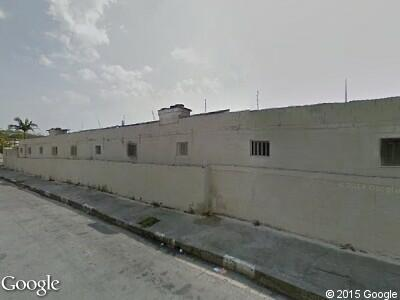

Scene: 50f5e565fdc9f065f0006833, Skill: 9.42185926507494


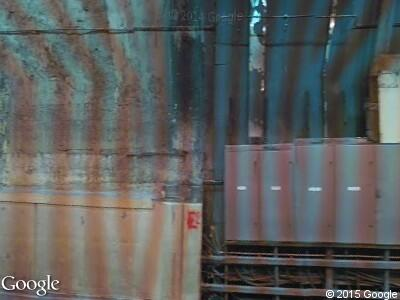

Scene: 513e1d1efdc9f03587009902, Skill: 9.541565156895782


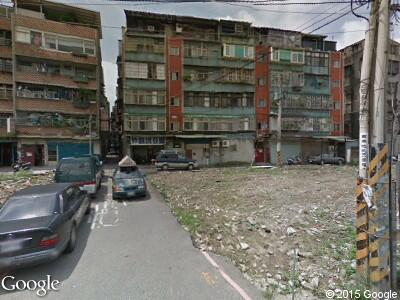

Scene: 50f4450bfdc9f065f000342e, Skill: 9.921223459522105


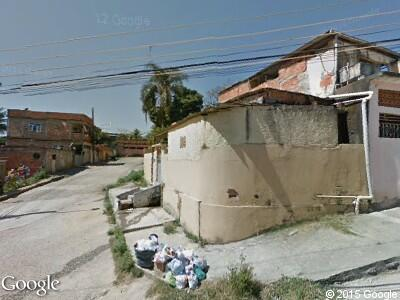

Scene: 50f5eb70fdc9f065f0008350, Skill: 10.282153526991756


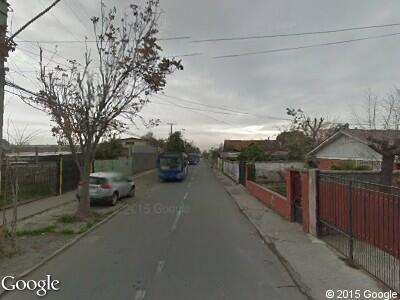

Scene: 513d7a4ffdc9f035870067ad, Skill: 10.302567022101083


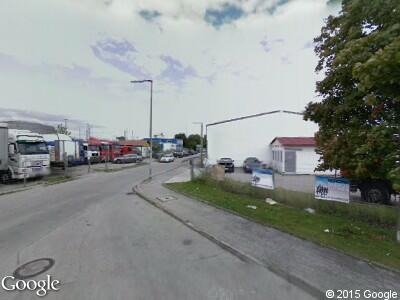

Scene: 51392666818ede1296001074, Skill: 10.304795710333227


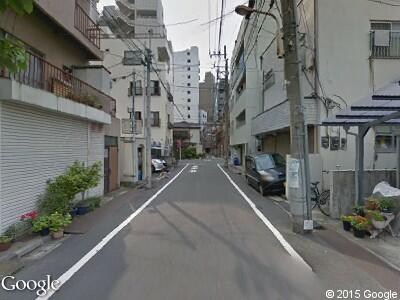

Scene: 513e7039fdc9f0358700c69d, Skill: 10.307635367561353


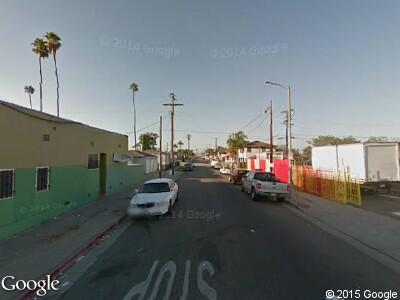

Scene: 5141380dfdc9f04926005129, Skill: 10.317523864605038


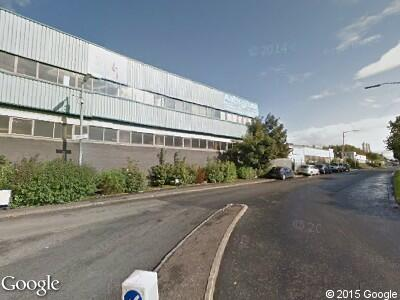

Scene: 51413581fdc9f04926004a23, Skill: 10.396958863622952


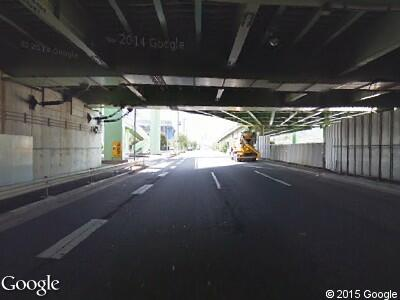

Scene: 513f12affdc9f0358700c9e7, Skill: 10.42958857914202


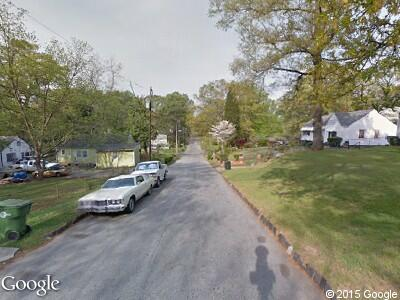

Scene: 513da087fdc9f035870089c1, Skill: 39.87885937402914


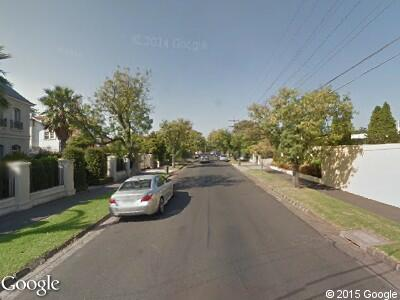

Scene: 514143dafdc9f04926006446, Skill: 39.890235951713976


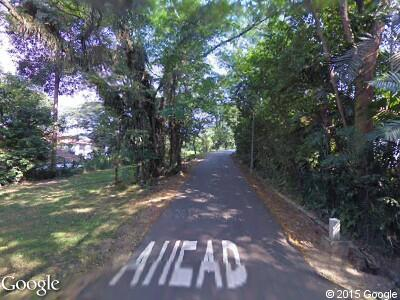

Scene: 50f561c1fdc9f065f00056ad, Skill: 39.9437534867637


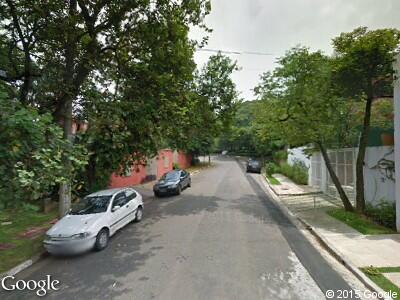

Scene: 50f5e688fdc9f065f0006cd8, Skill: 39.97060015156363


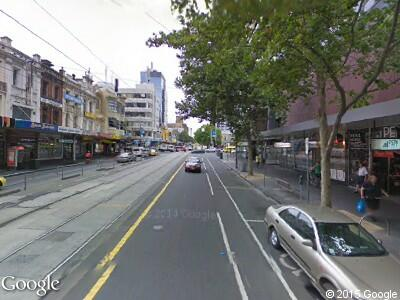

Scene: 51414256fdc9f049260062ae, Skill: 39.97479811940024


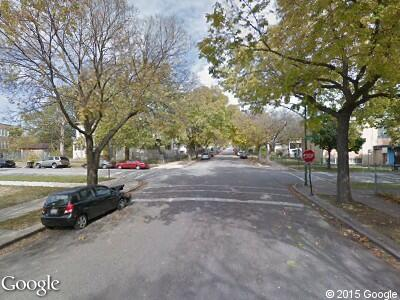

Scene: 513cbbc2fdc9f03587000f1c, Skill: 40.07078288051807


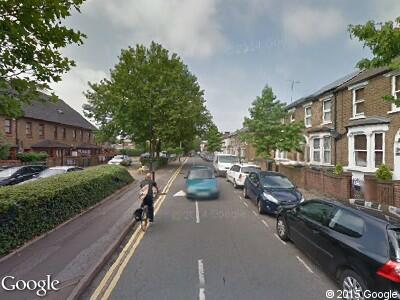

Scene: 513e1d09fdc9f035870098cc, Skill: 40.10333743880642


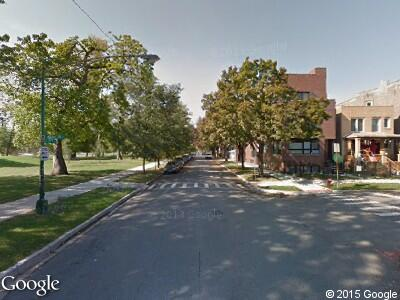

Scene: 513cbfd4fdc9f035870012fe, Skill: 40.172947032715896


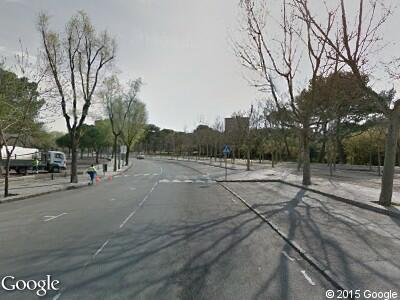

Scene: 51408f2cfdc9f04926000036, Skill: 40.61834839858212


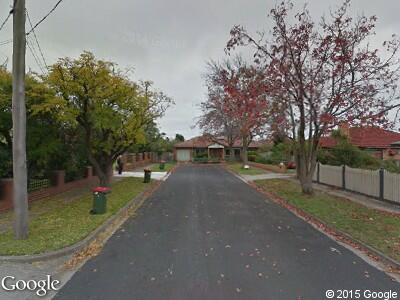

Scene: 514148dafdc9f04926006d46, Skill: 40.63331289160849


In [54]:
# show images for the worst and best scenes
worst_scenes = sorted_skills[:10]
best_scenes = sorted_skills[-10:]

for scene, skill in worst_scenes:
    img_path = find_image_path(scene)
    if os.path.exists(img_path):
        img = Image.open(img_path)
        display(img)
        print(f"Scene: {scene}, Skill: {skill.mu}")
    else:
        print(f"Image for scene {scene} not found.")
        
for scene, skill in best_scenes:
    img_path = find_image_path(scene)
    if os.path.exists(img_path):
        img = Image.open(img_path)
        display(img)
        print(f"Scene: {scene}, Skill: {skill.mu}")
    else:
        print(f"Image for scene {scene} not found.")

In [50]:
os.listdir(MIT_PLACE_PULSE_DIR / "images")

['-33.410908_-70.659391_513d9bcdfdc9f03587007b15_Santiago.JPG',
 '-33.467868_-70.721101_513d7f6dfdc9f035870075ee_Santiago.JPG',
 '24.979058_121.524195_50f43b6efdc9f065f000308f_Taipei.JPG',
 '-19.914416_-43.963358_513d5ff0fdc9f03587003c63_BeloHorizonte.JPG',
 '55.821180_37.651028_513e1e22fdc9f03587009ba3_Moscow.JPG',
 '-26.172264_28.128532_514138bcfdc9f049260052be_Johannesburg.JPG',
 '55.739152_37.615690_513e2212fdc9f0358700a4f6_Moscow.JPG',
 '33.737387_-84.434053_513d9ec3fdc9f035870084f3_Atlanta.JPG',
 '-19.939157_-43.993849_513d60cafdc9f03587003d7b_BeloHorizonte.JPG',
 '-33.437603_-70.770128_513d9ca7fdc9f03587007dfa_Santiago.JPG',
 '48.777850_2.250595_513e5fa6fdc9f0358700b28e_Paris.JPG',
 '42.328494_-71.056925_513d6c12fdc9f03587004e94_Boston.JPG',
 '-37.863150_145.053720_51414774fdc9f04926006a66_Melbourne.JPG',
 '-26.268960_28.058625_51413badfdc9f04926005a00_Johannesburg.JPG',
 '-23.659704_-46.674682_50f5e56dfdc9f065f00068f7_SaoPaulo.JPG',
 '33.681107_-84.393055_513d9c22fdc9f03587007c